# Curso Deep Learning Prático com TensorFlow e Python
26/06/2024

***

### Construção do primeiro perceptron

Importação das bibliotecas

In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importação da base de dados

In [9]:
temperatura_df = pd.read_csv('Celsius-to-Fahrenheit.csv')
temperatura_df.reset_index(drop=True, inplace=True)
temperatura_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [10]:
temperatura_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [11]:
temperatura_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


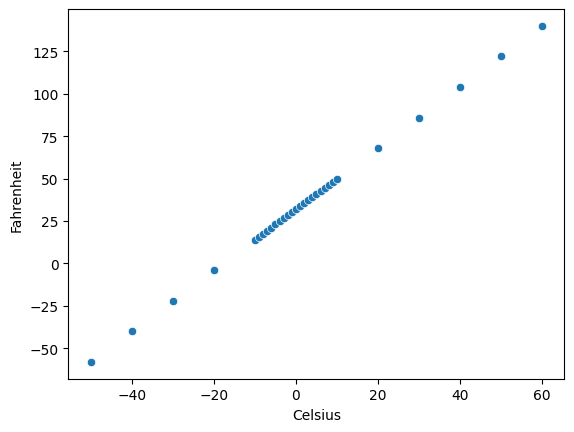

In [12]:
sns.scatterplot(x='Celsius', y='Fahrenheit', data=temperatura_df);


Configuração da base de dados de treinamento

In [13]:
X_train = temperatura_df['Celsius']
y_train = temperatura_df['Fahrenheit']

Construção e treinamento do modelo

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))
model.summary()

/home/michel/Documentos/PLANNER/deep_learning_prático_com_tensorflow_e_python/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-26 12:10:13.349318: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2024-06-26 12:10:13.349411: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: mss
2024-06-26 12:10:13.349429: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: mss
2024-06-26 12:10:13.349612: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss='mean_squared_error')

In [16]:
epochs_hist = model.fit(X_train, y_train, epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step - loss: 1059.9878
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1006.0054
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 990.2126
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 930.0519
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 896.0053
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 882.5377
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 852.5240
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 810.9895
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 779.0999
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 759.4172
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 737.1051
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 705.8124
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 673.9770
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 649.6357
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - l

Avaliação do modelo

In [17]:
epochs_hist.history.keys()

dict_keys(['loss'])

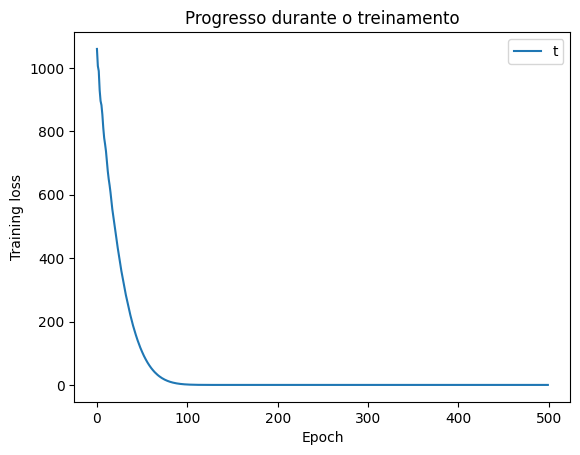

In [18]:
plt.plot(epochs_hist.history['loss'])
plt.title('Progresso durante o treinamento')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend('training loss')

In [19]:
model.get_weights()

[array([[1.7999998]], dtype=float32), array([32.000015], dtype=float32)]

testando o modelo

In [24]:
temp_c = 0
temp_c_array = np.array([[temp_c]]) 
temp_f = model.predict(temp_c_array)
print(temp_f)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[32.000015]]
